In [1]:
from __future__ import absolute_import, division, print_function
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D, Lambda, UpSampling2D
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Autoencoder architecture for MNIST dataset
input_img = Input(shape=(28,28,1,))
flat = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape(target_shape = (28,28,1,))(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
def print_imgs(X):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 2))
    for i in range(n):
        # display reconstruction
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()

original images:


<Figure size 1440x144 with 0 Axes>

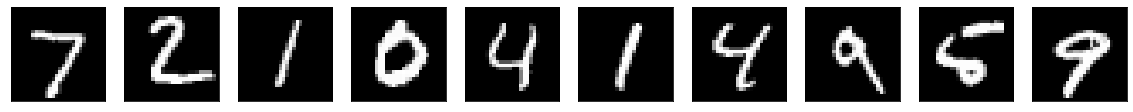

decoded images at epoch  5 :


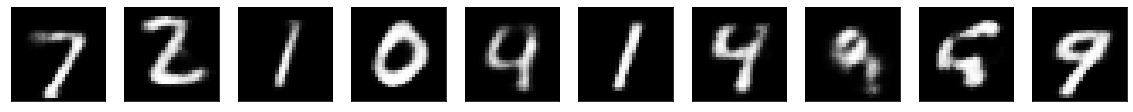

decoded images at epoch  10 :


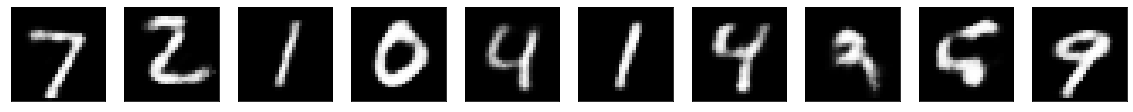

decoded images at epoch  15 :


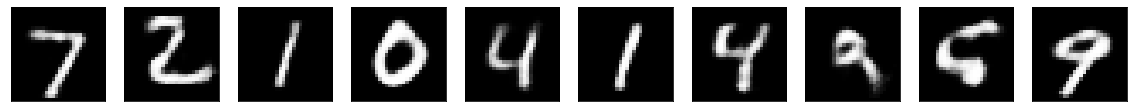

decoded images at epoch  20 :


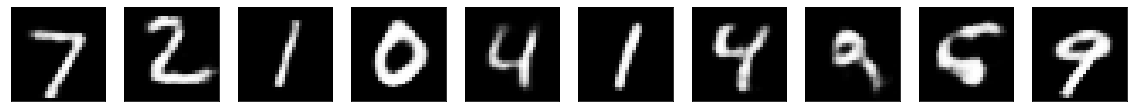

decoded images at epoch  25 :


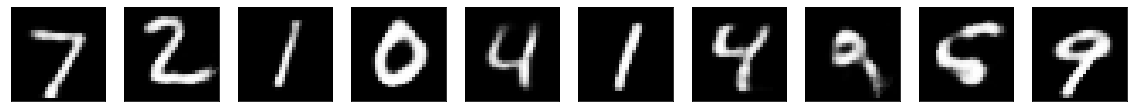

decoded images at epoch  30 :


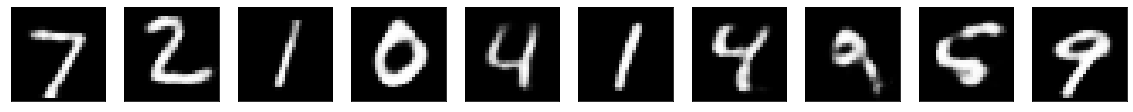

decoded images at epoch  35 :


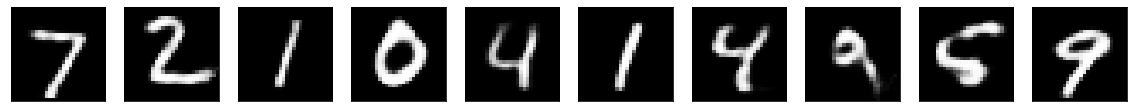

decoded images at epoch  40 :


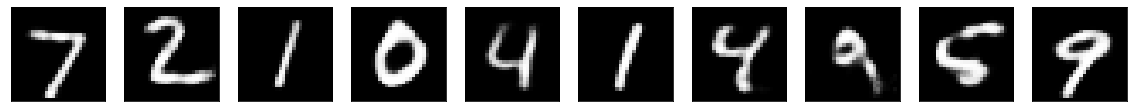

decoded images at epoch  45 :


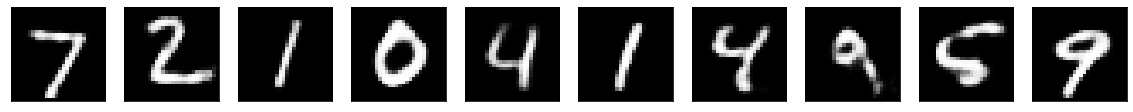

decoded images at epoch  50 :


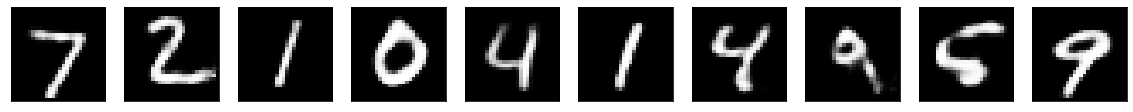

In [ ]:
#Training the autoencoder

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])
    
for i in range(10):
    autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)
    
    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_9 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

<Figure size 1440x144 with 0 Axes>

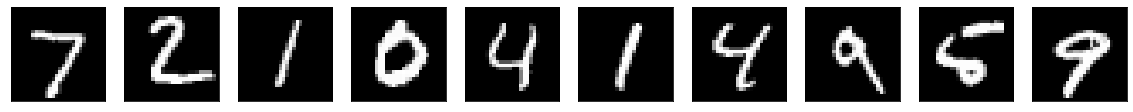

decoded images at epoch  5 :


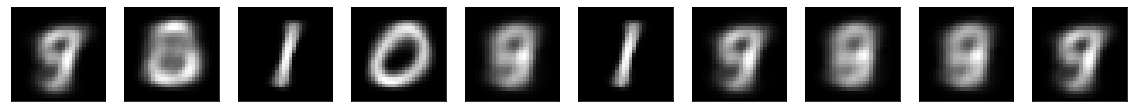

decoded images at epoch  10 :


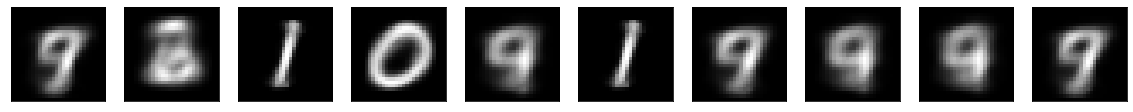

decoded images at epoch  15 :


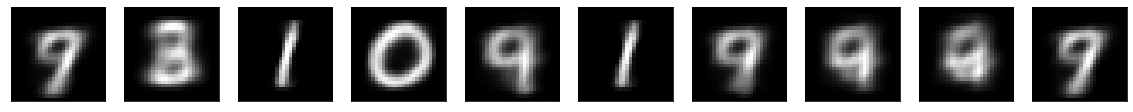

decoded images at epoch  20 :


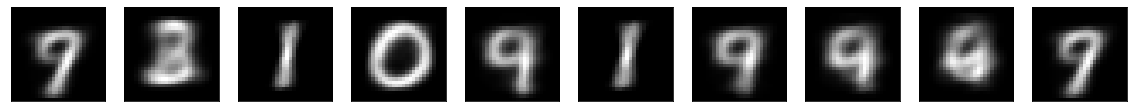

decoded images at epoch  25 :


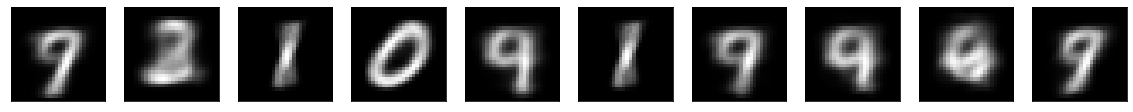

decoded images at epoch  30 :


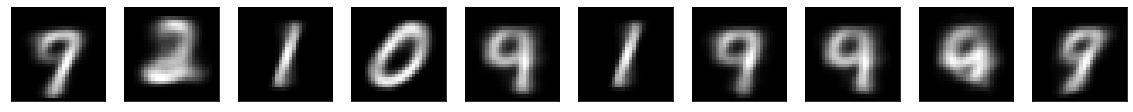

decoded images at epoch  35 :


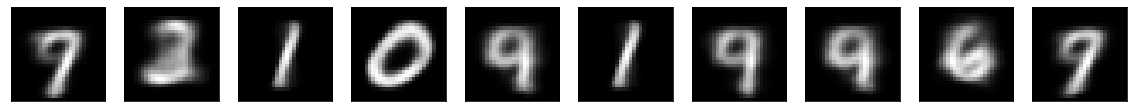

decoded images at epoch  40 :


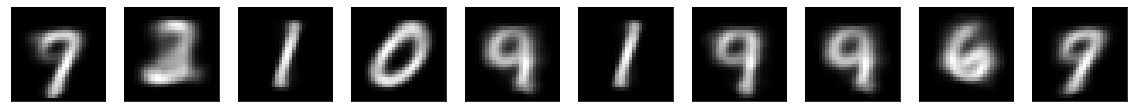

decoded images at epoch  45 :


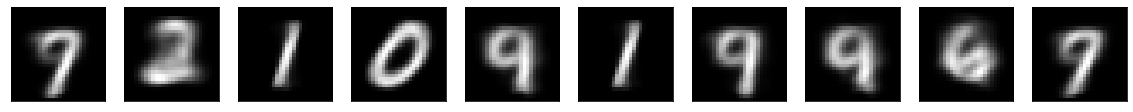

decoded images at epoch  50 :


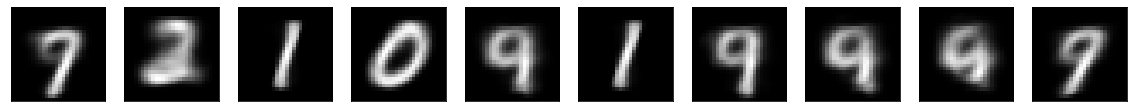

In [ ]:
#Encoding in 2 dimensions and reconstruction 

input_img = Input(shape=(28,28,1,))
flat = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat)
encoded = Dense(32, activation='relu')(encoded)

encoded = Dense(2, activation='relu')(encoded) #2 neurons hidden layer

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape(target_shape = (28,28,1,))(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

n = 10  
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])
    
for i in range(10):
    autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)
    
    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)

In [ ]:
#Convolution Autoencoder for MNIST dataset

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
conv_autoencoder.summary()

Model: "functional_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 8)          

In [ ]:
x_train.shape

(60000, 28, 28, 1)

original images:


<Figure size 1440x144 with 0 Axes>

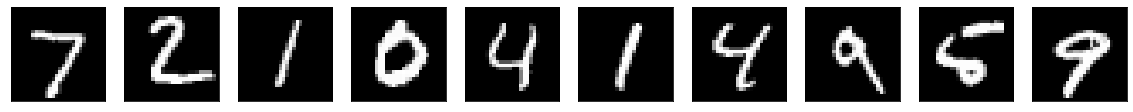

decoded images at epoch  2 :


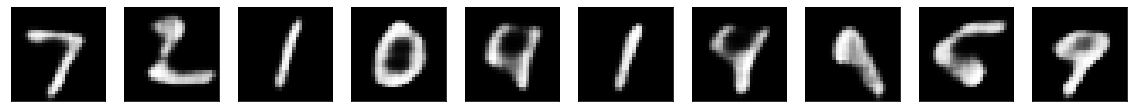

decoded images at epoch  4 :


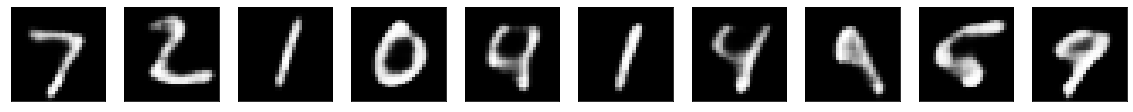

decoded images at epoch  6 :


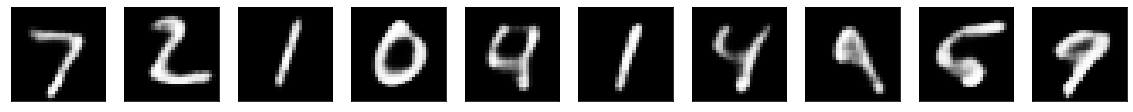

decoded images at epoch  8 :


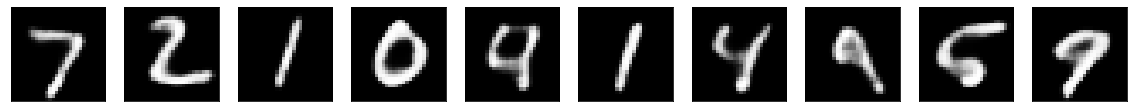

decoded images at epoch  10 :


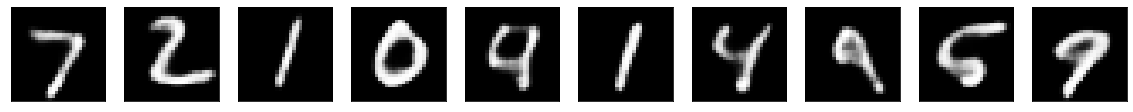

decoded images at epoch  12 :


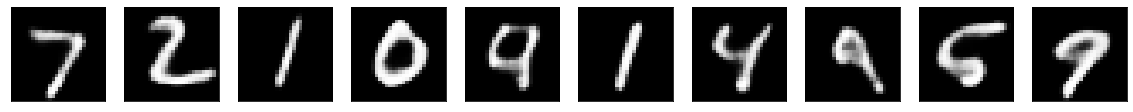

decoded images at epoch  14 :


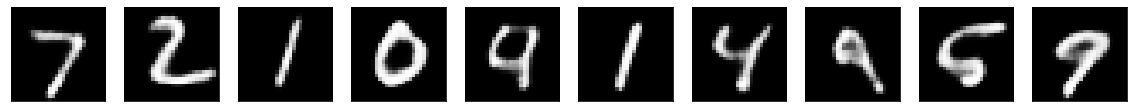

decoded images at epoch  16 :


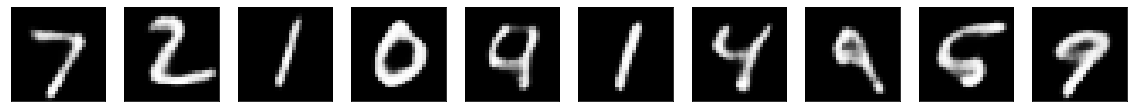

decoded images at epoch  18 :


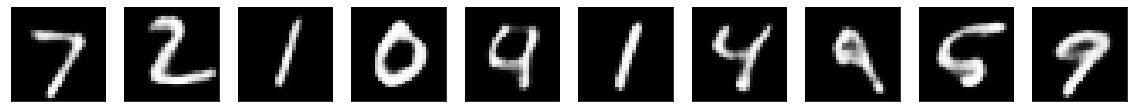

decoded images at epoch  20 :


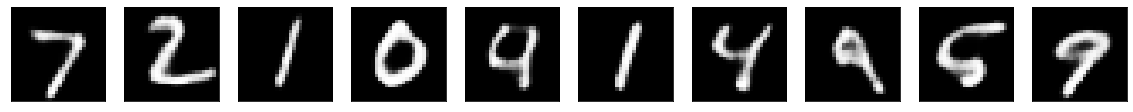

In [ ]:
#Image denoising experiment
#Adding random noise to MNIST Dataset
#and reconstructing the original images


n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])
    
for i in range(10):
    conv_autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                verbose = 0)
    
    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*2 + 2, ':')
    decoded_imgs = conv_autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)

Original images in test


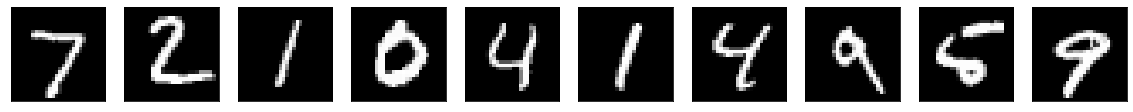

Corresponding noisy images


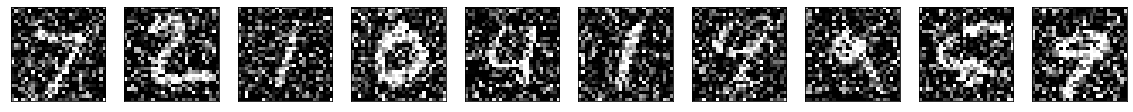

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print('Original images in test')
print_imgs(x_test[:10])
print('Corresponding noisy images')
print_imgs(x_test_noisy[:10])

In [ ]:
#Convolution Autoencoder for denoising

input_img = Input(shape=(28, 28, 1))  
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img) 
encoded = MaxPooling2D((2, 2), padding='same')(encoded) 
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded) 
encoded = MaxPooling2D((2, 2), padding='same')(encoded) 

decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(128, (3, 3), activation='relu',padding='same')(decoded) 
decoded = UpSampling2D((2, 2))(decoded) 
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded) 

noisy_autoencoder = Model(input_img, decoded)
noisy_autoencoder.compile(optimizer='adam', loss='mean_squared_error')
noisy_autoencoder.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 32)        36896     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 14, 14, 32)      

Test images


<Figure size 1440x144 with 0 Axes>

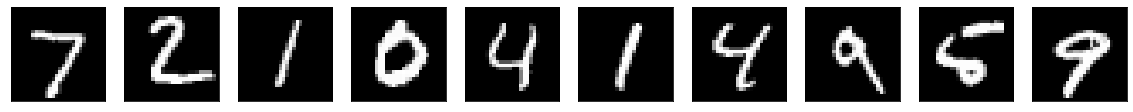

Noisy Test images


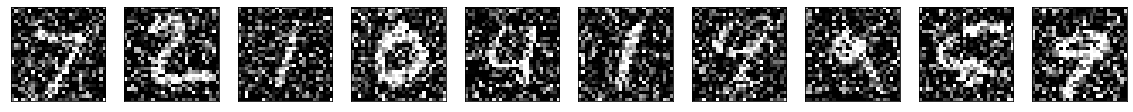

###

decoded test images at epoch  5 :


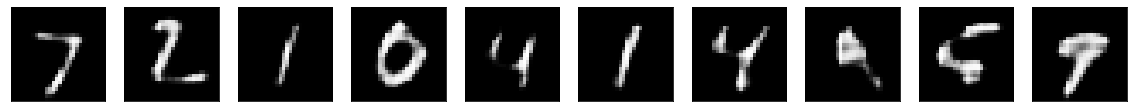

decoded noisy test images at epoch  5 :


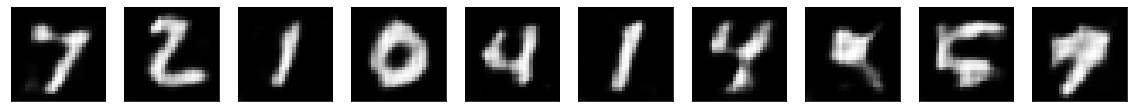

###

###

decoded test images at epoch  10 :


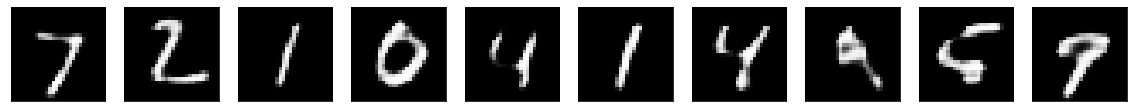

decoded noisy test images at epoch  10 :


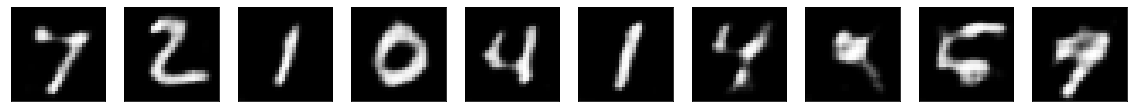

###

###

decoded test images at epoch  15 :


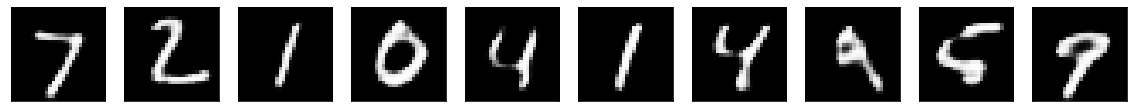

decoded noisy test images at epoch  15 :


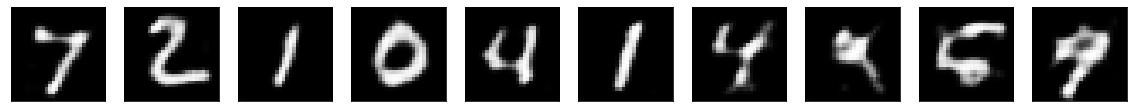

###

###

decoded test images at epoch  20 :


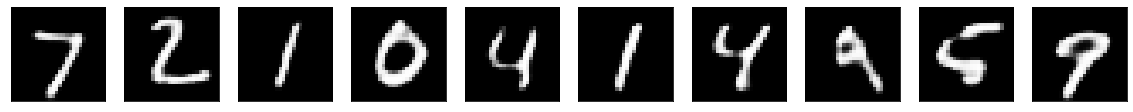

decoded noisy test images at epoch  20 :


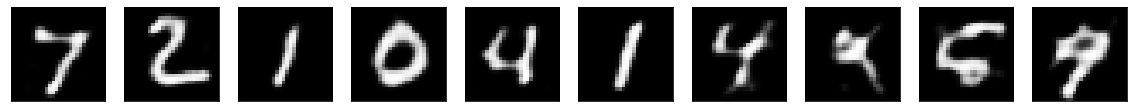

###

###

decoded test images at epoch  25 :


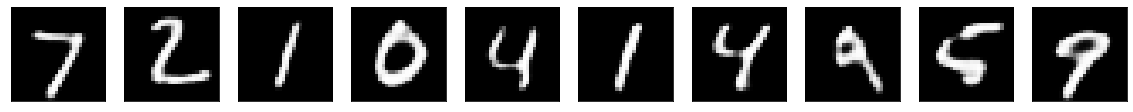

decoded noisy test images at epoch  25 :


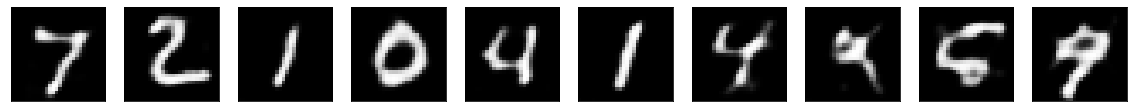

###

###

decoded test images at epoch  30 :


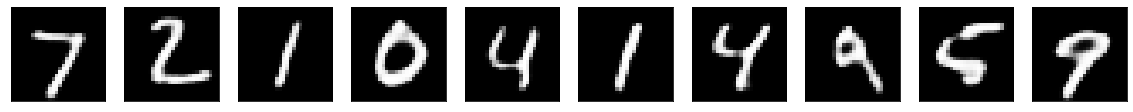

decoded noisy test images at epoch  30 :


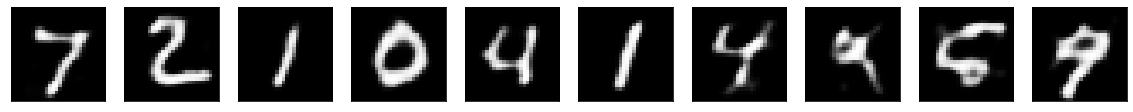

###

###

decoded test images at epoch  35 :


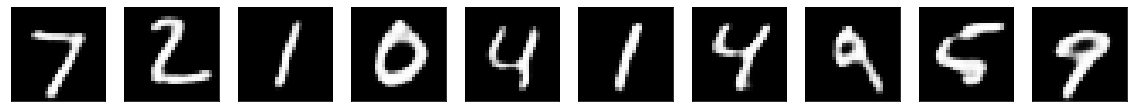

decoded noisy test images at epoch  35 :


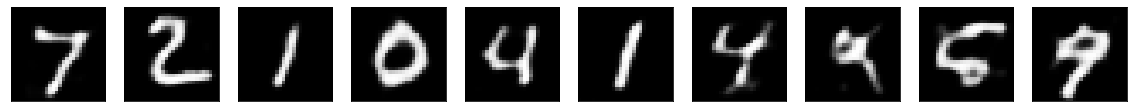

###

###

decoded test images at epoch  40 :


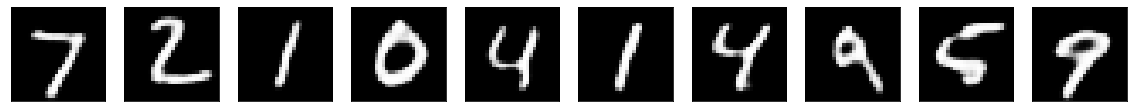

decoded noisy test images at epoch  40 :


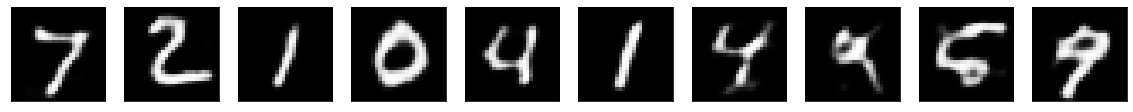

###

###

decoded test images at epoch  45 :


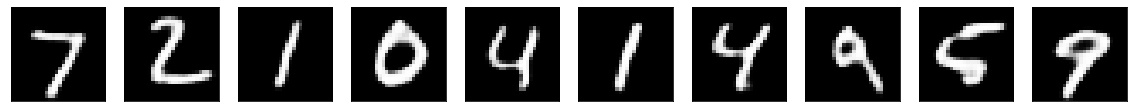

decoded noisy test images at epoch  45 :


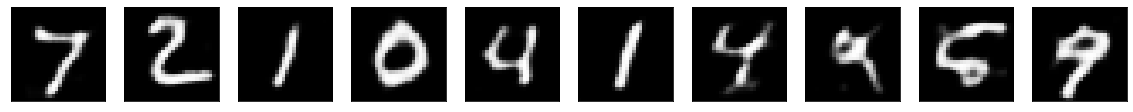

###

###

decoded test images at epoch  50 :


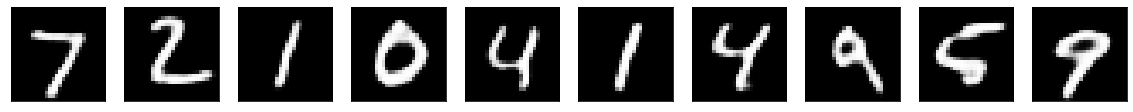

decoded noisy test images at epoch  50 :


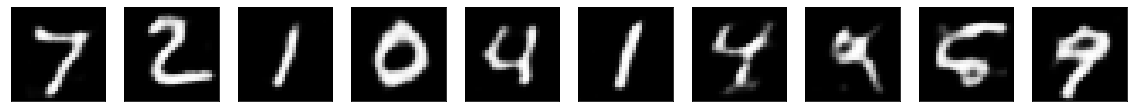

###



In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('Test images')
print_imgs(x_test[:10])
print('Noisy Test images')

print_imgs(x_test_noisy[:10])
    
for i in range(10):
    autoencoder.fit(x_train_noisy[:1000], x_train[:1000],
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)
    
    # encode and decode some digits
    # note that we take them from the *test* set
    print('###\n')
    print('decoded test images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)
    print('decoded noisy test images at epoch ', i*5 + 5, ':')
    decoded_imgs2 = autoencoder.predict(x_test_noisy[:10])
    print_imgs(decoded_imgs2)
    print('###\n')

In [ ]:
#Using CIFAR10 dataset


from keras.datasets import cifar10

cifar = cifar10.load_data()

(x_train, y_train), (x_test, y_test) = cifar

print('train data:\t', x_train.shape, y_train.shape)
print('test data:\t', x_test.shape, y_test.shape)

train data:	 (50000, 32, 32, 3) (50000, 1)
test data:	 (10000, 32, 32, 3) (10000, 1)


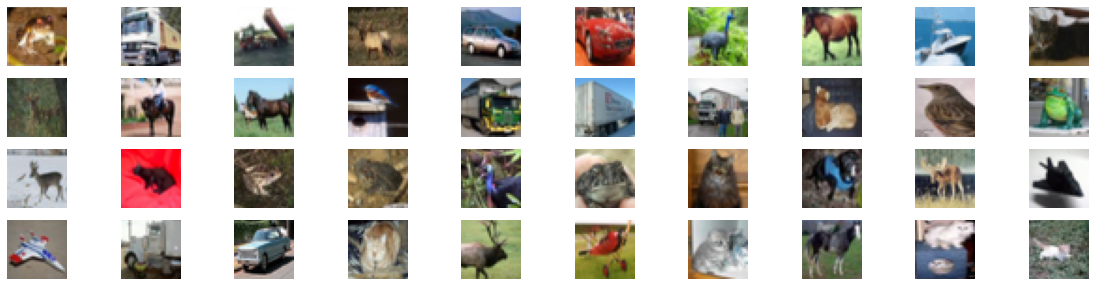

In [ ]:
plt.figure(figsize=(20,5))
for i in range(40):
    plt.subplot(4, 10, i+1)
    example = x_train[i]
    plt.imshow(example, cmap = 'gray')
    plt.axis('off')
plt.show()

In [ ]:
x_test = x_test/255
x_train = x_train/255
x_train.shape

(50000, 32, 32, 3)

Original images in test


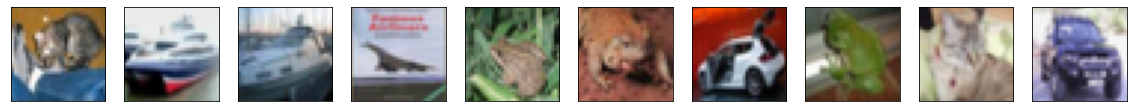

Corresponding noisy images


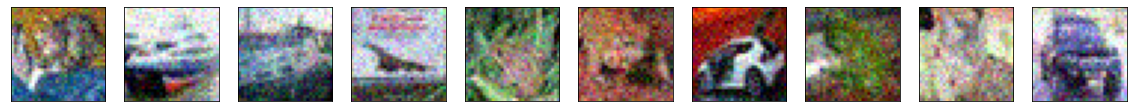

In [ ]:
#add noise to cifar

noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
def print_imgs(X):
    n = 10 
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(32, 32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()
print('Original images in test')
print_imgs(x_test[:10])
print('Corresponding noisy images')
print_imgs(x_test_noisy[:10])

In [ ]:
#Convolution AE architecture for CIFAR image denoising

input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

noisy_autoencoder = Model(input_img, decoded)
noisy_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
noisy_autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)       

In [ ]:
x_train.shape

(50000, 32, 32, 3)

Test images


<Figure size 1440x144 with 0 Axes>

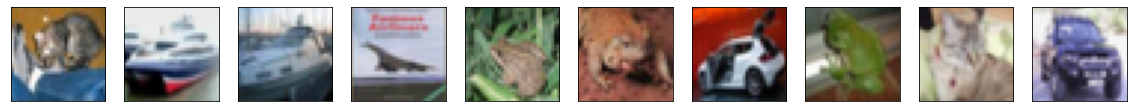

Noisy Test images


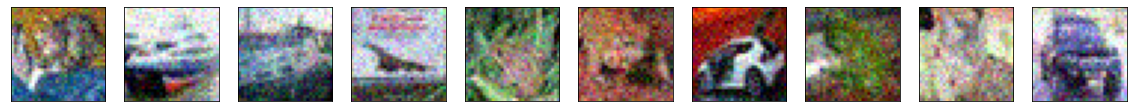

###

decoded test images at epoch  5 :


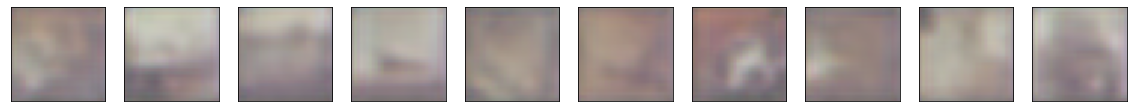

decoded noisy test images at epoch  5 :


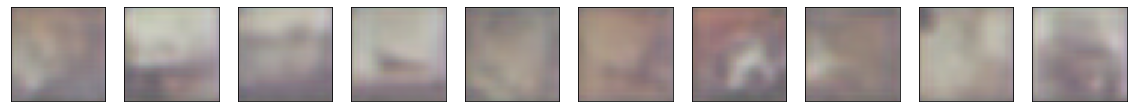

###

###

decoded test images at epoch  10 :


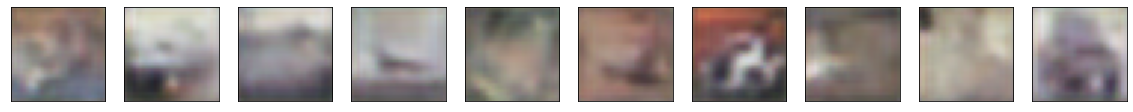

decoded noisy test images at epoch  10 :


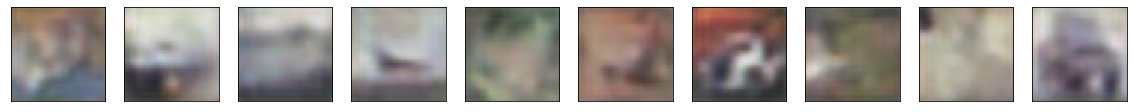

###

###

decoded test images at epoch  15 :


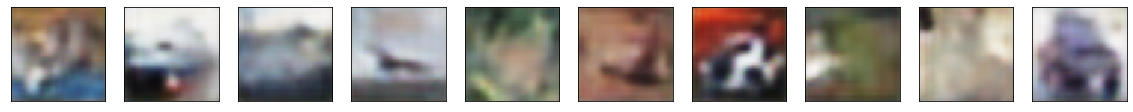

decoded noisy test images at epoch  15 :


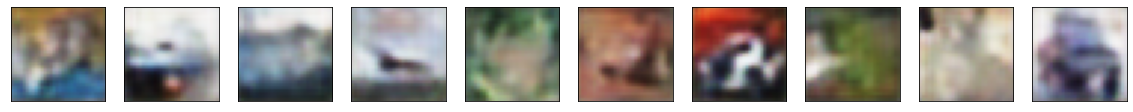

###

###

decoded test images at epoch  20 :


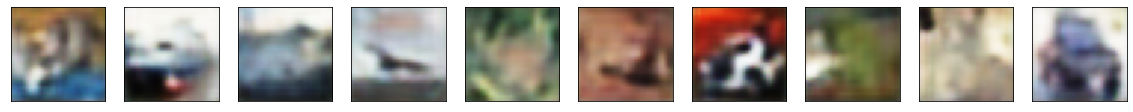

decoded noisy test images at epoch  20 :


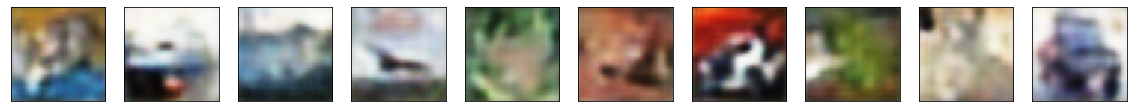

###

###

decoded test images at epoch  25 :


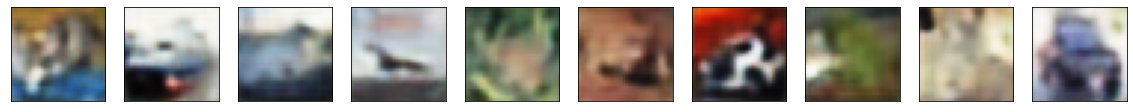

decoded noisy test images at epoch  25 :


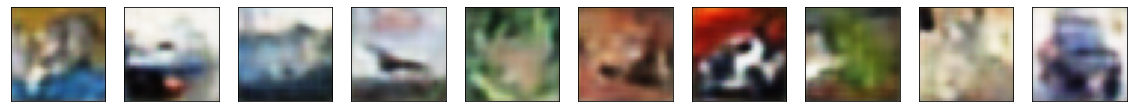

###

###

decoded test images at epoch  30 :


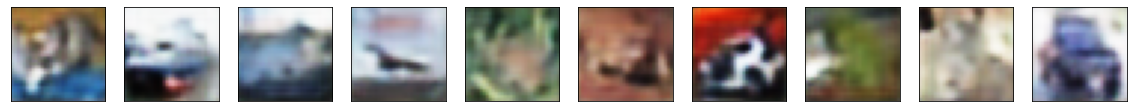

decoded noisy test images at epoch  30 :


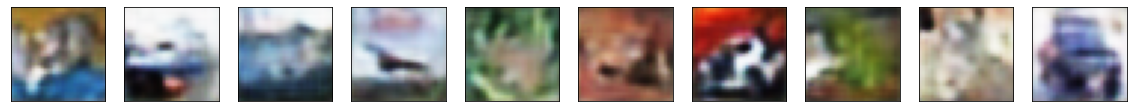

###

###

decoded test images at epoch  35 :


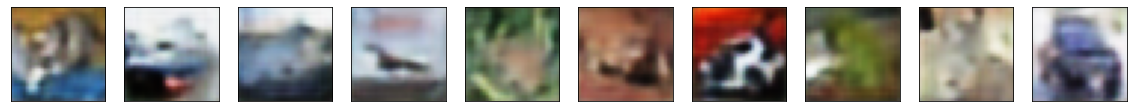

decoded noisy test images at epoch  35 :


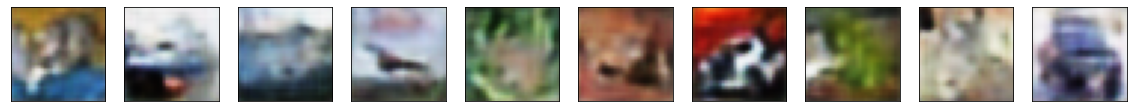

###

###

decoded test images at epoch  40 :


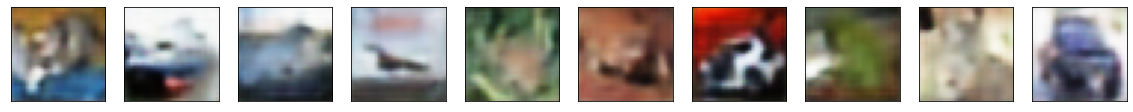

decoded noisy test images at epoch  40 :


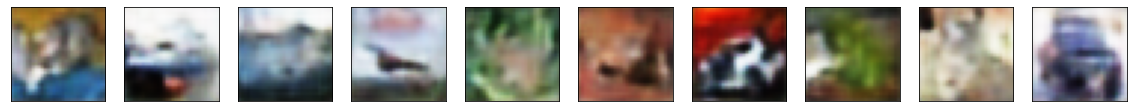

###

###

decoded test images at epoch  45 :


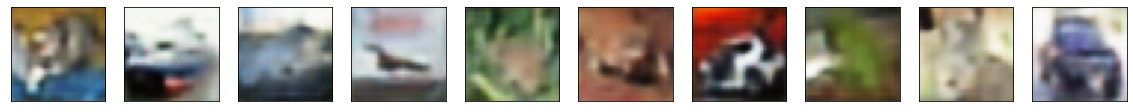

decoded noisy test images at epoch  45 :


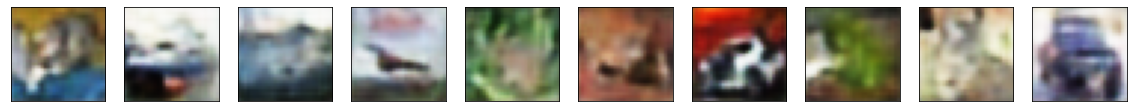

###

###

decoded test images at epoch  50 :


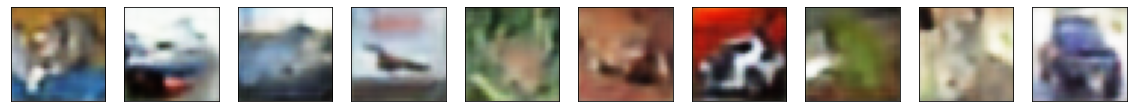

decoded noisy test images at epoch  50 :


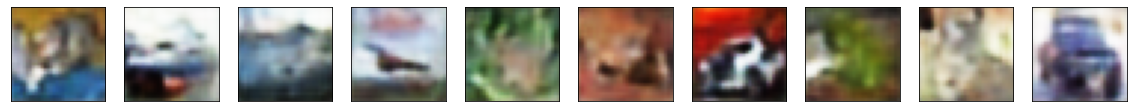

###



In [ ]:
n = 10 
plt.figure(figsize=(20, 2))
print('Test images')
print_imgs(x_test[:10])
print('Noisy Test images')

print_imgs(x_test_noisy[:10])
    
for i in range(10):
    noisy_autoencoder.fit(x_train_noisy[:1000], x_train[:1000],
                epochs=5,
                batch_size=32,
                shuffle=True,
                verbose = 0)
    
    # encode and decode some digits
    # note that we take them from the *test* set
    print('###\n')
    print('decoded test images at epoch ', i*5 + 5, ':')
    decoded_imgs = noisy_autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)
    print('decoded noisy test images at epoch ', i*5 + 5, ':')
    decoded_imgs2 = noisy_autoencoder.predict(x_test_noisy[:10])
    print_imgs(decoded_imgs2)
    print('###\n')

    # this model on cifar dataset performs better on low batch size of 32 than 256 which
    # was used on mnist dataset